# House Price Prediction

By: Martin Farfan

Dataset Obtained: https://www.kaggle.com/datasets/zafarali27/house-price-prediction-dataset/data

# 1. IMPORT LIBRARIES

In [1]:
# DATA PROCESSING
import pandas as pd # data processing
import numpy as np
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns #Python library for Visualization

# 2. READ THE DATA

In [2]:
houseprice = pd.read_csv('./Datos/House Price Prediction Dataset.csv')
houseprice

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


# 3. CLEANING THE RAW DATASET

## 3.1 Cleaning outsiders

## 3.2 Handling Missing Values

In [3]:
# Check for missing values
missing_values = houseprice.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


# 4. EXPLORATORY DATA ANALYSIS

## 4.1 Understand Column Meaning

In [4]:
houseprice.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [5]:
houseprice.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [6]:
houseprice.query('Garage == "No" and Location == "Downtown"')

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
9,10,2185,3,3,1,2000,Downtown,Poor,No,340375
12,13,2933,4,3,2,1901,Downtown,Poor,No,849947
...,...,...,...,...,...,...,...,...,...,...
1965,1966,741,2,4,3,1947,Downtown,Excellent,No,649262
1972,1973,1275,1,2,2,2014,Downtown,Good,No,678705
1977,1978,1355,5,4,2,1936,Downtown,Poor,No,337251
1984,1985,4006,2,3,3,1960,Downtown,Poor,No,852874


In [7]:
houseprice.Location.unique()

array(['Downtown', 'Suburban', 'Urban', 'Rural'], dtype=object)

In [8]:
houseprice.Condition.value_counts()

Condition
Fair         521
Excellent    511
Poor         507
Good         461
Name: count, dtype: int64

In [9]:
houseprice.drop(columns=['Id']).groupby("Location").describe()

Area                                                             \
          count         mean          std    min      25%     50%      75%   
Location                                                                     
Downtown  558.0  2813.625448  1349.332536  504.0  1503.75  2846.0  4016.25   
Rural     474.0  2745.951477  1248.336844  501.0  1693.00  2679.5  3822.75   
Suburban  483.0  2794.020704  1275.603460  501.0  1698.00  2883.0  3819.00   
Urban     485.0  2786.232990  1298.757150  502.0  1636.00  2876.0  3885.00   

                 Bedrooms            ... YearBuilt          Price  \
             max    count      mean  ...       75%     max  count   
Location                             ...                            
Downtown  4999.0    558.0  2.994624  ...    1997.0  2023.0  558.0   
Rural     4973.0    474.0  2.974684  ...    1992.0  2023.0  474.0   
Suburban  4994.0    483.0  2.977226  ...    1995.5  2023.0  483.0   
Urban     4997.0    485.0  3.068041  ...    1990.0  2023.0  485.0   

                                                                      \
                   mean            std      min        25%       50%   
Location                                                               
Downtown  536059.661290  275319.395682  51845.0  298737.75  532340.5   
Rural     538613.943038  277037.894087  50005.0  302311.00  527560.0   
Suburban  557416.333333  266672.175503  50064.0  328429.00  589618.0   
Urban     518963.548454  285998.094535  51082.0  265196.00  520917.0   

                               
                75%       max  
Location                       
Downtown  773654.75  998128.0  
Rural     795844.75  994218.0  
Suburban  777552.00  999656.0  
Urban     778927.00  999453.0  

[4 rows x 48 columns]

Area: Square footage of the house, which is generally one of the most important predictors of price.

Bedrooms & Bathrooms: The number of rooms in a house significantly affects its value. Homes with more rooms tend to be priced higher.

Floors: The number of floors in a house could indicate a larger, more luxurious home, potentially raising its price.

Year Built: The age of the house can affect its condition and value. Newly built houses are generally more expensive than older ones.

Location: Houses in desirable locations such as downtown or urban areas tend to be priced higher than those in suburban or rural areas.

Condition: The current condition of the house is critical, as well-maintained houses (in 'Excellent' or 'Good' condition) will attract higher prices compared to houses in 'Fair' or 'Poor' condition.

Garage: Availability of a garage can increase the price due to added convenience and space.

Price: The target variable, representing the sale price of the house, used to train machine learning models to predict house prices based on the other features.

## 4.2 Check Data Integrity

In [10]:
# Check for missing values
missing_values = houseprice.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


## 4.3 Visualize Distributions

### 4.3.1 Basic Exploration

In [11]:
houseprice.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [12]:
houseprice1 = houseprice.drop(columns=['Id'])
houseprice1

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1062,5,1,2,1903,Rural,Poor,No,476925
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [13]:
houseprice1.groupby("Location").describe()

Area                                                             \
          count         mean          std    min      25%     50%      75%   
Location                                                                     
Downtown  558.0  2813.625448  1349.332536  504.0  1503.75  2846.0  4016.25   
Rural     474.0  2745.951477  1248.336844  501.0  1693.00  2679.5  3822.75   
Suburban  483.0  2794.020704  1275.603460  501.0  1698.00  2883.0  3819.00   
Urban     485.0  2786.232990  1298.757150  502.0  1636.00  2876.0  3885.00   

                 Bedrooms            ... YearBuilt          Price  \
             max    count      mean  ...       75%     max  count   
Location                             ...                            
Downtown  4999.0    558.0  2.994624  ...    1997.0  2023.0  558.0   
Rural     4973.0    474.0  2.974684  ...    1992.0  2023.0  474.0   
Suburban  4994.0    483.0  2.977226  ...    1995.5  2023.0  483.0   
Urban     4997.0    485.0  3.068041  ...    1990.0  2023.0  485.0   

                                                                      \
                   mean            std      min        25%       50%   
Location                                                               
Downtown  536059.661290  275319.395682  51845.0  298737.75  532340.5   
Rural     538613.943038  277037.894087  50005.0  302311.00  527560.0   
Suburban  557416.333333  266672.175503  50064.0  328429.00  589618.0   
Urban     518963.548454  285998.094535  51082.0  265196.00  520917.0   

                               
                75%       max  
Location                       
Downtown  773654.75  998128.0  
Rural     795844.75  994218.0  
Suburban  777552.00  999656.0  
Urban     778927.00  999453.0  

[4 rows x 48 columns]

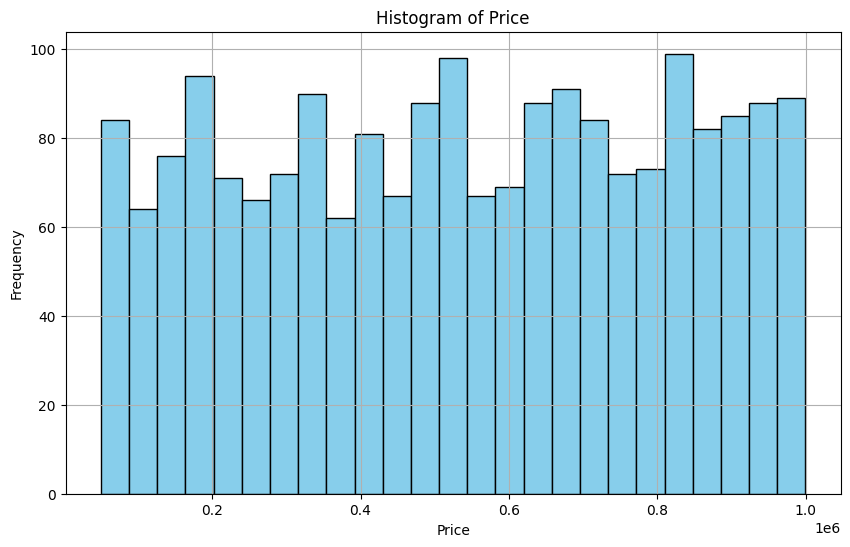

In [14]:
# histograms

plt.figure(figsize=(10,6)) #regula el tamaño, lo hace más grande
plt.hist(houseprice1['Price'], # 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Location', 'Condition', 'Garage', 'Price'
         bins=25, #cuantas columnas
         color='skyblue', edgecolor='black'
         )
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8824\3326515062.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=houseprice1.Bedrooms,data=houseprice1,palette="husl")


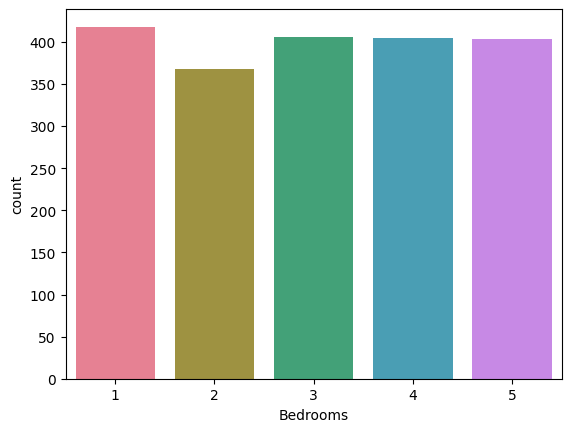

In [15]:
# countplots
sns.countplot(x=houseprice1.Bedrooms,data=houseprice1,palette="husl")
plt.show()

In [16]:
houseprice1['Floors'].value_counts()

Floors
2    691
1    661
3    648
Name: count, dtype: int64

### 4.3.2 Exploration between Variables

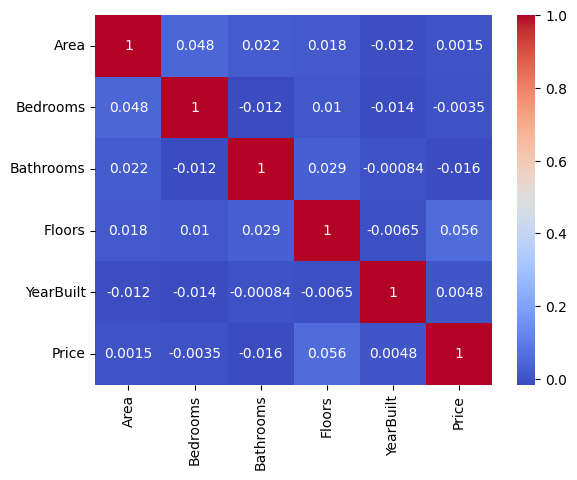

In [17]:
#compute correlations
correlation_matrix = houseprice1.corr(numeric_only=True)
correlation_matrix

sns.heatmap(correlation_matrix, 
            annot=True, #put numbers of correlation 
            cmap='coolwarm')
plt.show()


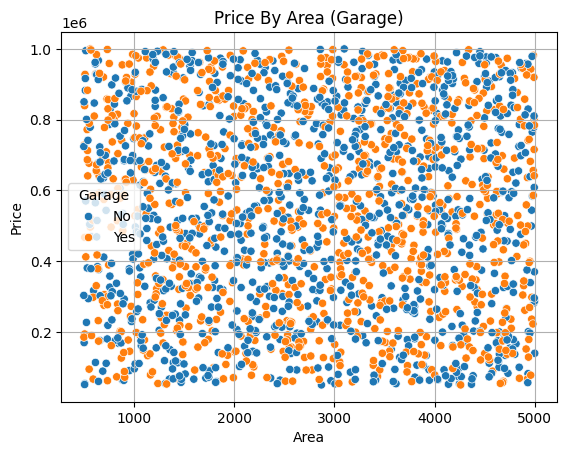

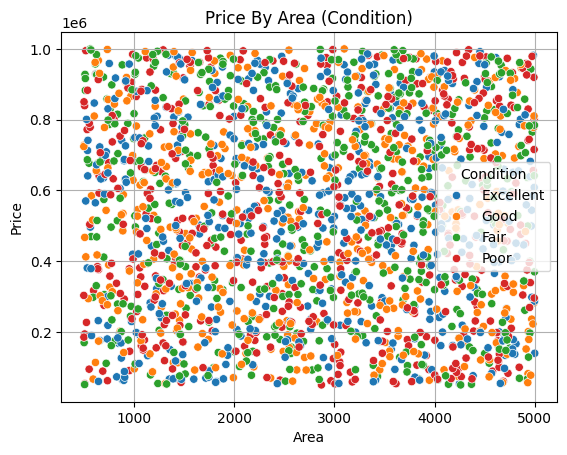

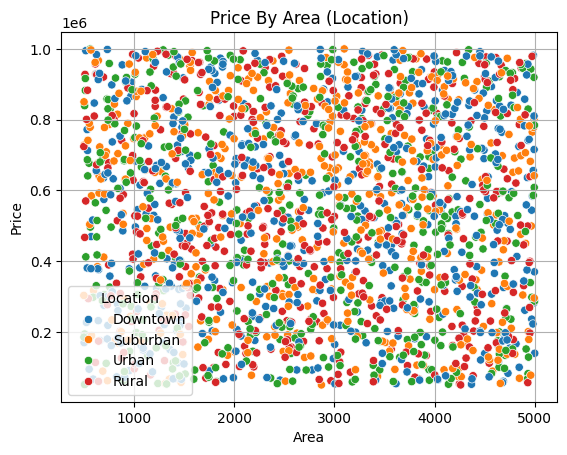

In [18]:
# Scatter plot: Price by Area, colored by Garage
sns.scatterplot(data=houseprice1, x="Area", y="Price", color="violet", hue="Garage")
plt.title("Price By Area (Garage)")
plt.xlabel("Area")
plt.ylabel("Price")
plt.grid()
plt.show()

# Scatter plot: Price by Area, colored by Condition
sns.scatterplot(data=houseprice1, x="Area", y="Price", color="violet", hue="Condition")
plt.title("Price By Area (Condition)")
plt.xlabel("Area")
plt.ylabel("Price")
plt.grid()
plt.show()

# Scatter plot: Price by Area, colored by Location
sns.scatterplot(data=houseprice1, x="Area", y="Price", color="violet", hue="Location")
plt.title("Price By Area (Location)")
plt.xlabel("Area")
plt.ylabel("Price")
plt.grid()
plt.show()

As observed, there is not a pattern

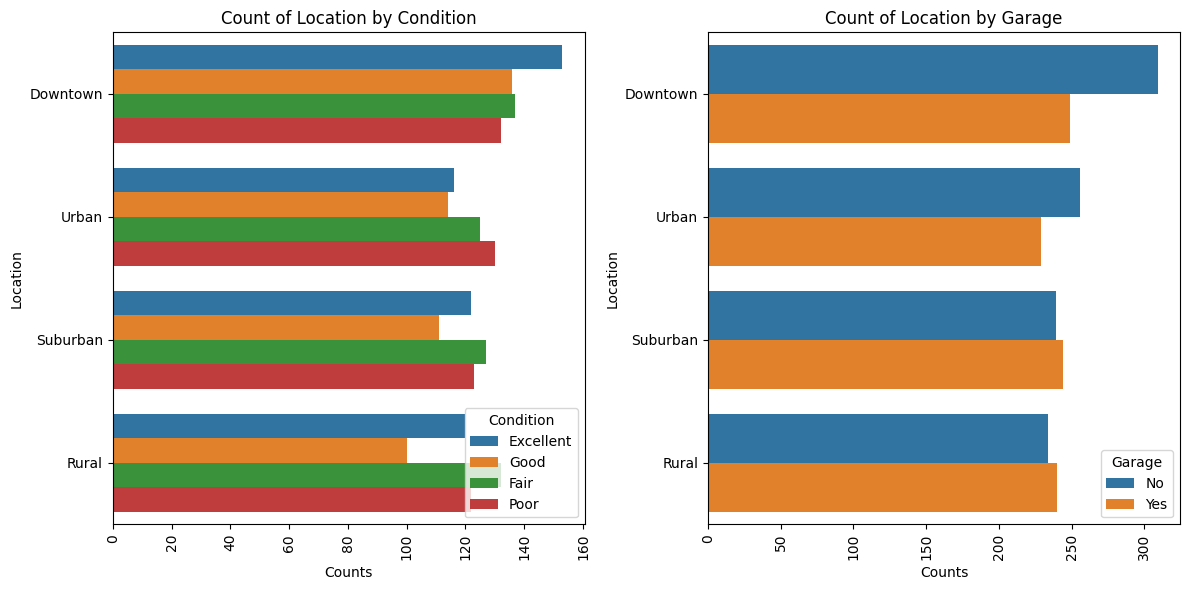

In [19]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1: Count of Location by Condition
sns.countplot(data=houseprice1, y="Location", order=houseprice1["Location"].value_counts().index, hue="Condition", ax=axs[0])
axs[0].set_title("Count of Location by Condition")
axs[0].set_xlabel("Counts")
axs[0].set_ylabel("Location")
axs[0].tick_params(axis='x', rotation=90)

# Subplot 2: Count of Location by Garage
sns.countplot(data=houseprice1, y="Location", order=houseprice1["Location"].value_counts().index, hue="Garage", ax=axs[1])
axs[1].set_title("Count of Location by Garage")
axs[1].set_xlabel("Counts")
axs[1].set_ylabel("Location")
axs[1].tick_params(axis='x', rotation=90)

# Layout so plots do not overlap
fig.tight_layout()

plt.show()


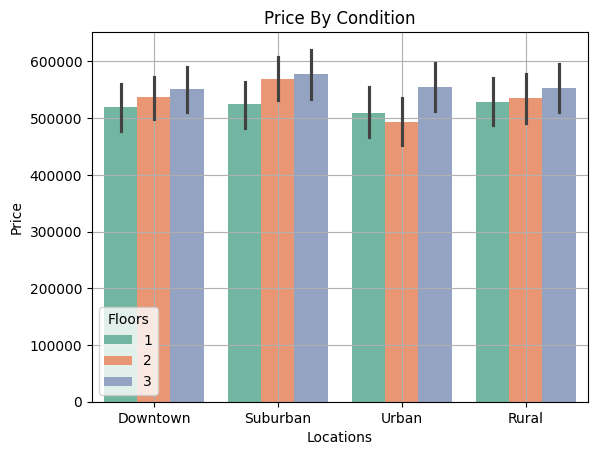

In [20]:
sns.barplot(data=houseprice1, x="Location", y="Price", 
            hue="Floors", #'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Condition', 'Garage'
            palette="Set2")
plt.title("Price By Condition")
plt.xlabel("Locations")
plt.ylabel("Price")
plt.grid()
plt.show()

In [21]:
houseprice1

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1062,5,1,2,1903,Rural,Poor,No,476925
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119


# 5. PREPROCESSING BEFORE MODELLING

## 5.0 Creating the Dataset for inputing into the model

In [22]:
housepriceModel = houseprice1.drop(columns='Price')
housepriceModel

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
0,1360,5,4,3,1970,Downtown,Excellent,No
1,4272,5,4,3,1958,Downtown,Excellent,No
2,3592,2,2,3,1938,Downtown,Good,No
3,966,4,2,2,1902,Suburban,Fair,Yes
4,4926,1,4,2,1975,Downtown,Fair,Yes
...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No
1996,3046,5,2,1,2019,Suburban,Poor,Yes
1997,1062,5,1,2,1903,Rural,Poor,No
1998,4062,3,1,2,1936,Urban,Excellent,Yes


In [23]:
y = houseprice1.Price
y

0       149919
1       424998
2       266746
3       244020
4       636056
         ...  
1995    295620
1996    580929
1997    476925
1998    161119
1999    482525
Name: Price, Length: 2000, dtype: int64

## 5.1 Encoding Categorical Features

In [24]:
X = pd.get_dummies(housepriceModel, columns=['Location','Garage'])
X

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Condition,Location_Downtown,Location_Rural,Location_Suburban,Location_Urban,Garage_No,Garage_Yes
0,1360,5,4,3,1970,Excellent,True,False,False,False,True,False
1,4272,5,4,3,1958,Excellent,True,False,False,False,True,False
2,3592,2,2,3,1938,Good,True,False,False,False,True,False
3,966,4,2,2,1902,Fair,False,False,True,False,False,True
4,4926,1,4,2,1975,Fair,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Poor,False,False,True,False,True,False
1996,3046,5,2,1,2019,Poor,False,False,True,False,False,True
1997,1062,5,1,2,1903,Poor,False,True,False,False,True,False
1998,4062,3,1,2,1936,Excellent,False,False,False,True,False,True


In [25]:
from sklearn.preprocessing import OrdinalEncoder

orden = [["Poor", "Fair", "Good", "Excellent"]]

encoder = OrdinalEncoder(categories=orden)
condition_encoded = encoder.fit_transform(housepriceModel[['Condition']])
X['Condition']=condition_encoded
X.Condition

0       3.0
1       3.0
2       2.0
3       1.0
4       1.0
       ... 
1995    0.0
1996    0.0
1997    0.0
1998    3.0
1999    1.0
Name: Condition, Length: 2000, dtype: float64

In [26]:
X

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Condition,Location_Downtown,Location_Rural,Location_Suburban,Location_Urban,Garage_No,Garage_Yes
0,1360,5,4,3,1970,3.0,True,False,False,False,True,False
1,4272,5,4,3,1958,3.0,True,False,False,False,True,False
2,3592,2,2,3,1938,2.0,True,False,False,False,True,False
3,966,4,2,2,1902,1.0,False,False,True,False,False,True
4,4926,1,4,2,1975,1.0,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,0.0,False,False,True,False,True,False
1996,3046,5,2,1,2019,0.0,False,False,True,False,False,True
1997,1062,5,1,2,1903,0.0,False,True,False,False,True,False
1998,4062,3,1,2,1936,3.0,False,False,False,True,False,True


## 5.2 Divide into Train and Test Set

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, shuffle=True)
#X_train, X_test, y_train, y_test = train_test_split(housepriceModel, y, test_size=0.2, random_state=3)

In [28]:
print(X_train)

      Area  Bedrooms  Bathrooms  Floors  YearBuilt  Condition  \
1478  3471         4          4       1       1917        1.0   
87    2954         3          1       3       1996        3.0   
750   2539         5          4       1       1969        2.0   
838   4256         3          4       2       1903        1.0   
549   3456         5          3       1       1926        3.0   
...    ...       ...        ...     ...        ...        ...   
952   2323         5          2       3       1974        0.0   
1667  1526         1          2       2       2018        3.0   
1273  3219         5          1       2       1954        2.0   
1688  4931         3          4       1       1980        0.0   
1898  2453         5          3       2       1950        2.0   

      Location_Downtown  Location_Rural  Location_Suburban  Location_Urban  \
1478               True           False              False           False   
87                False           False               True     

## 5.3 Scaling Numerical Features

In [29]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler_X = StandardScaler()
# first, we need to fit the scaler with the train dataset
scaler_X.fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

#print(X_train[:5])

# for whole dataset - for clustering
scaler_X = StandardScaler()
Xs = scaler_X.fit_transform(X)


""" # Standardize the data
scaler_Y = StandardScaler()
# first, we need to fit the scaler with the train dataset
scaler_Y.fit(y_train.values.reshape(-1,1))
y_train = scaler_Y.transform(y_train.values.reshape(-1,1))
y_test = scaler_Y.transform(y_test.values.reshape(-1,1)) """

' # Standardize the data\nscaler_Y = StandardScaler()\n# first, we need to fit the scaler with the train dataset\nscaler_Y.fit(y_train.values.reshape(-1,1))\ny_train = scaler_Y.transform(y_train.values.reshape(-1,1))\ny_test = scaler_Y.transform(y_test.values.reshape(-1,1)) '

# 6. MODELLING

## Model: XGBOOST

### 6.1 Construct the Model

In [30]:
import xgboost as xgb

xgbReg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42,
                          tree_method="hist", early_stopping_rounds=10)


xgbReg.fit(X_train,y_train, eval_set=[(X_test, y_test)],verbose=True)

[0]	validation_0-rmse:280786.79624
[1]	validation_0-rmse:281136.94783
[2]	validation_0-rmse:283066.49875
[3]	validation_0-rmse:283470.91223
[4]	validation_0-rmse:283957.93530
[5]	validation_0-rmse:284426.12958
[6]	validation_0-rmse:284253.61599
[7]	validation_0-rmse:284965.96218
[8]	validation_0-rmse:287260.39095
[9]	validation_0-rmse:287541.60193
[10]	validation_0-rmse:287989.12784


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,10
,enable_categorical,False
,eval_metric,None


### 6.2 Evaluate the Model

In [31]:
y_pred = xgbReg.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse.__round__(2))
print("Mean Absolute Error:", mae.__round__(2))
print("R-squared:", r2.__round__(2))

Mean Squared Error: 78841225216.0
Mean Absolute Error: 243603.28
R-squared: -0.02


## Model: Random Forest

### 6.1 Construct the Model

In [33]:
#from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

rfModel = RandomForestRegressor(n_estimators=1000, random_state=42)
rfModel.fit(X_train, y_train)

,n_estimators,1000
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 6.2 Evaluate the Model

In [34]:
y_pred1 = rfModel.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print("Mean Squared Error:", mse.__round__(2))
print("Mean Absolute Error:", mae.__round__(2))
print("R-squared:", r2)

Mean Squared Error: 81584290850.3
Mean Absolute Error: 247544.34
R-squared: -0.05456172521252767


## Model: GAMLSS

https://github.com/ppsp-team/PyNM

### 6.1 Construct the Model

### 6.2 Evaluate the Model